In [1]:
# Package import cell, data file read-in
# and conversion to all floats

import numpy as np
import pandas as pd
import sklearn
from sklearn import preprocessing
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from IPython.display import Image
import scipy as sp
from io import StringIO
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import collections
import seaborn as sn

bt = pd.read_csv('tornadoes-binary.csv', index_col='EVENT_ID')
rt = pd.read_csv('tornadoes-nonbinary.csv', index_col='EVENT_ID')
mt = pd.read_csv('tornadoes-multiclass.csv', index_col='EVENT_ID')

bt = bt.astype(float)
rt = rt.astype(float)
mt = mt.astype(float)

Maximum Number of Casualties: 

1311

Multiclass Casualties Class Distribution:

0:     0.923050638966719
1-19:  0.06779197703820132
20+:   0.009157383995079614


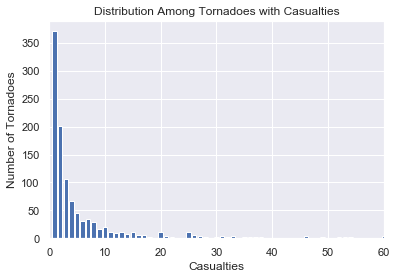

In [2]:
# Quick view of percentage-wise class breakdown of tornadoes
# Quick graph view of casualties volume among all tornadoes 
# with at least one casualty

rt_counts = rt['casualties'].value_counts().sort_index()
rt_counts_without_zero = rt_counts.drop(0)

print('Maximum Number of Casualties: \n\n'+str(int(list(rt_counts.index)[-1])))

mt_counts = mt['multiclass_casualties'].value_counts().sort_index()
mt_zeros = mt_counts[0]/(mt_counts[0]+mt_counts[1]+mt_counts[2])
mt_ones = mt_counts[1]/(mt_counts[0]+mt_counts[1]+mt_counts[2])
mt_twos = mt_counts[2]/(mt_counts[0]+mt_counts[1]+mt_counts[2])

print('\nMulticlass Casualties Class Distribution:\n\n0:     '+str(mt_zeros)+'\n1-19:  '+str(mt_ones)+'\n20+:   '+str(mt_twos))


sn.set(font_scale=1)
fig, axs = plt.subplots(1, 1, sharey=True)
axs.bar(rt_counts_without_zero.index, rt_counts_without_zero)
# axs[0].set_xlabel('Casualties')
# axs[0].set_ylabel('Number of Tornadoes')
# axs[0].title.set_text('Initial Multiclass Tornado Distribution')
# axs[1].bar(['0', '1-19', '20+'], balanced_counts.values())
# axs[1].set_xlabel('Casualties')
# axs[1].title.set_text('Distribution Post-SMOTE Rebalancing')
# plt.subplots_adjust(top=0.85)
# plt.show()

# plt.bar(rt_counts_without_zero.index, rt_counts_without_zero)
plt.title('Distribution Among Tornadoes with Casualties')
plt.ylabel('Number of Tornadoes')
plt.xlabel('Casualties')
plt.xlim(0,60)

plt.show()

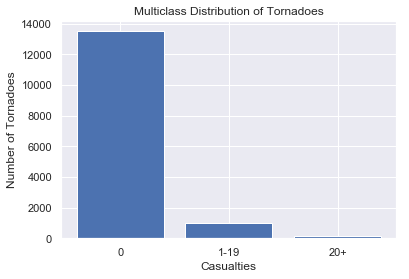

In [3]:
# Visualize multiclass tornado distribution

plt.bar(['0', '1-19', '20+'], mt_counts)
plt.title('Multiclass Distribution of Tornadoes')
plt.ylabel('Number of Tornadoes')
plt.xlabel('Casualties')
plt.show()

In [4]:
# Split off a test set 80:20 and create CSVs

Xmt = mt.drop(columns=['multiclass_casualties'])
ymt = mt['multiclass_casualties']

X_train, X_test, y_train, y_test = train_test_split(Xmt, ymt, test_size=0.2, stratify=ymt)

#X_train.to_csv('tornado-xtrain.csv')
#y_train.to_csv('tornado-ytrain.csv')
#X_test.to_csv('tornado-xtest.csv')
#y_test.to_csv('tornado-ytest.csv')

In [5]:
set(y_test)

{0.0, 1.0, 2.0}